# Models

# Table of contents:
* 1 [Preparation](#intro-bullet)
* 2 [Logistic Regression](#first-bullet)
* 3 [Random Forest](#second-bullet)
* 3 [Balanced Random Forest](#third-bullet)
* 4 [Naive Bayes](#fourth-bullet)
* 5 [KNN](#fifth-bullet)
* 6 [Decision Tree](#sixth-bullet)
* 7 [Stacking](#seventh-bullet)
* 8 [Boosting](#eigth-bullet)
    * 8.1 [LigthGBM](#nineth-bullet)
    * 8.2 [Gradient Boosting](#tenth-bullet)
    * 8.3 [Histogram Gradient Boosting 1](#eleventh-bullet)
    * 8.4 [Histogram Gradient Boosting 2](#12-bullet)
* 9 [Bagging](#13-bullet)

## 1. Preparation <a class="anchor" id="intro-bullet"></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix
%matplotlib inline

## REMARK
the clf/model/rf or other names assigned to names of classifiers are estimator instances. There are firsty fitted to the model; that is, it must learn from the model. This is done by passing our training set to the **fit** method. Then we use **predic** or **predict_proba** to predict values of TARGET column or probability of such value

In [11]:
# Basic feature engineering
tmp_data1 = pd.read_csv("./featureData1.csv")

# split into train test sets
train_data1, test_data1 = train_test_split(tmp_data1,test_size=0.2)
test_data1.reset_index(inplace = True, drop = True)
train_data1.reset_index(inplace = True, drop = True)

# More detailed feature engineering
tmp_data2 = pd.read_csv("./featureData2.csv")

# split into train test sets
train_data2, test_data2 = train_test_split(tmp_data2,test_size=0.2)
test_data2.reset_index(inplace = True, drop = True)
train_data2.reset_index(inplace = True, drop = True)

In [12]:
# drop the columns "Unnamed: 0"
test_data1=test_data1.drop(columns='Unnamed: 0')
train_data1=train_data1.drop(columns='Unnamed: 0')

test_data2=test_data2.drop(columns='Unnamed: 0')
train_data2=train_data2.drop(columns='Unnamed: 0')

## 2. Logistic Regression <a class="anchor" id="first-bullet"></a>

In [13]:
from sklearn.linear_model import LogisticRegression
def LogRegModel(train, test):
     # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET'])
    test= test.drop(columns = ['TARGET'])
    
    # Make the model with the specified regularization parameter
    # log_reg = LogisticRegression(C = 0.0001, class_weight="balanced")
    weights = {0:0.0878, 1:0.9122}
    log_reg = LogisticRegression(C = 0.0001, class_weight=weights)

    # Train on the training data
    log_reg.fit(train, labels)
    # Select only second column(TARGET)
    log_reg_pred = log_reg.predict_proba(test)[:, 1]
    tescik = log_reg.predict(test)
    f1 = f1_score(test_labels, tescik)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, log_reg_pred))
    print('F1 score: %f' % f1)
    return roc_auc_score(test_labels, log_reg_pred), log_reg_pred

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


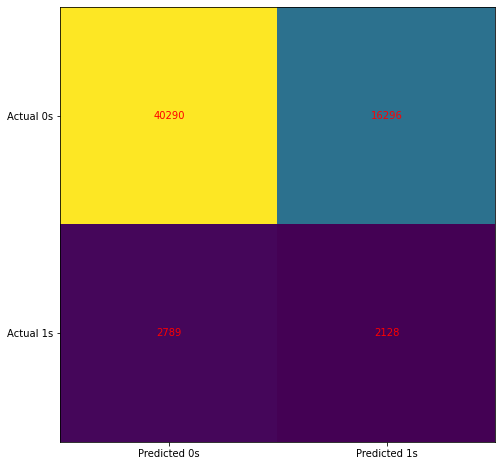

Train/Test split results:
ROC 0.6066766572730411
F1 score: 0.182340


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


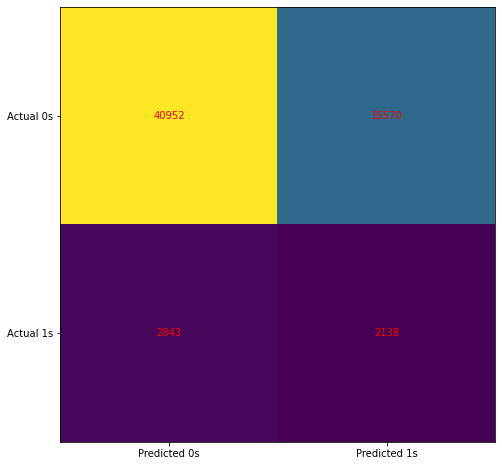

Train/Test split results:
ROC 0.6199397525181161
F1 score: 0.188461


In [15]:
LRScore1 = LogRegModel(train_data1,test_data1)
LRScore2 = LogRegModel(train_data2,test_data2)

## 3. Random Forest <a class="anchor" id="second-bullet"></a>

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

def RanForModel(train,test):
    rf = RandomForestClassifier(n_estimators=100,
                                max_depth=10,min_samples_split=20,
                                min_samples_leaf=6,
                                max_features='auto')
     # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET'])
    test= test.drop(columns = ['TARGET'])
    
    rf.fit(X = train, y = labels)
    # Select only second column(TARGET)
    ran_for_pred = rf.predict_proba(test)[:, 1]
    
    tescik = rf.predict(test)
    f1 = f1_score(test_labels, tescik)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print('F1 score: %f' % f1)
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, ran_for_pred))
    return roc_auc_score(test_labels, ran_for_pred),ran_for_pred
   


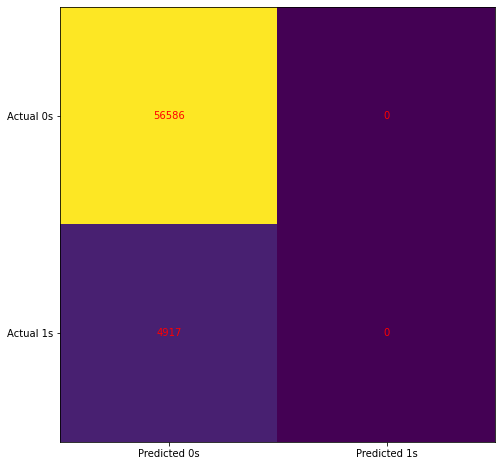

F1 score: 0.000000
Train/Test split results:
ROC 0.7328862273532819


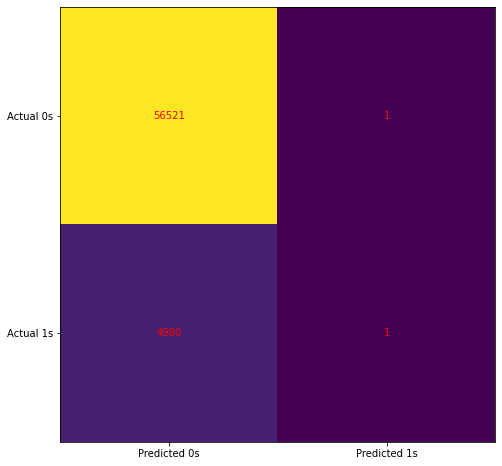

F1 score: 0.000401
Train/Test split results:
ROC 0.7336986205554994


In [17]:
RFScore1 = RanForModel(train_data1,test_data1)
RFScore2 = RanForModel(train_data2,test_data2)

## 4. Balanced Random Forest <a class="anchor" id="third-bullet"></a>

In [18]:
from imblearn.ensemble import BalancedRandomForestClassifier

def imbalancedRanFor(train,test):
    rf = BalancedRandomForestClassifier(class_weight='balanced')
     # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET'])
    test= test.drop(columns = ['TARGET'])
    
    rf.fit(X = train, y = labels)
    # Select only second column(TARGET)
    ran_for_pred = rf.predict_proba(test)[:, 1]
    
    tescik = rf.predict(test)
    f1 = f1_score(test_labels, tescik)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print('F1 score: %f' % f1)
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, ran_for_pred))
    return roc_auc_score(test_labels, ran_for_pred),ran_for_pred

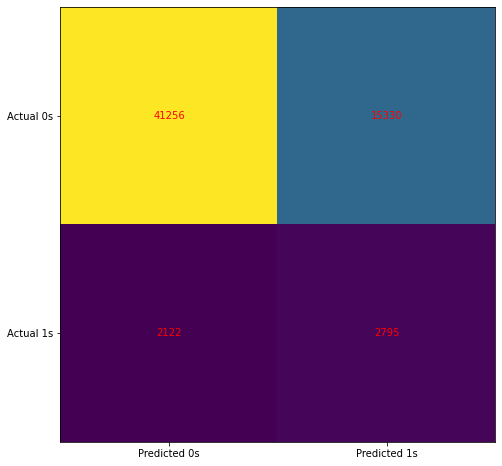

F1 score: 0.242600
Train/Test split results:
ROC 0.7096529261649076


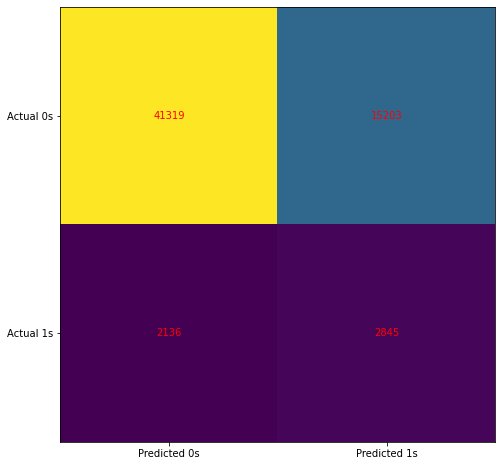

F1 score: 0.247080
Train/Test split results:
ROC 0.7066336545096908


In [19]:
imbRFScore1 =imbalancedRanFor(train_data1,test_data1)
imbRFScore2 =imbalancedRanFor(train_data2,test_data2)

## 5. Naive Bayesian<a class="anchor" id="fourth-bullet"></a>

In [20]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_auc_score

def NaiveBayModel(train,test):
    
    
    clf = BernoulliNB()
    
     # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
    clf.fit(X = train, y = labels)
    clf_pred = clf.predict_proba(test)[:, 1]
    tescik = clf.predict(test)
    f1 = f1_score(test_labels, tescik)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, clf_pred))
    f1 = f1_score(test_labels, tescik)
    print('F1 score: %f' % f1)
    return roc_auc_score(test_labels, clf_pred),clf_pred
  


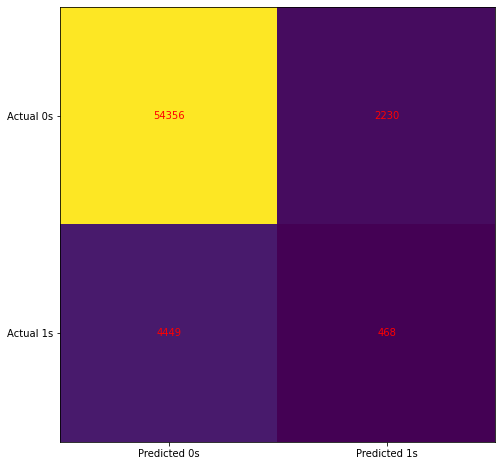

Train/Test split results:
ROC 0.6190323304938536
F1 score: 0.122915


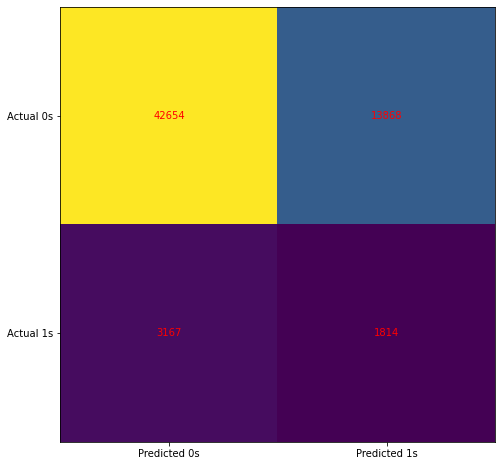

Train/Test split results:
ROC 0.6058775460972707
F1 score: 0.175580


In [21]:
NBScore1 = NaiveBayModel(train_data1,test_data1)
NBScore2 = NaiveBayModel(train_data2,test_data2)

## 6. K-Nearest Neighbors <a class="anchor" id="fifth-bullet"></a>

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

def KNNModel(train,test):
    
    
    clf = KNeighborsClassifier(n_neighbors=3)
    
     # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
    clf.fit(X = train, y = labels)
    clf_pred = clf.predict_proba(test)[:, 1]
    tescik = clf.predict(test)
    f1 = f1_score(test_labels, tescik)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, clf_pred))
    f1 = f1_score(test_labels, tescik)
    print('F1 score: %f' % f1)
    return roc_auc_score(test_labels, clf_pred), clf_pred

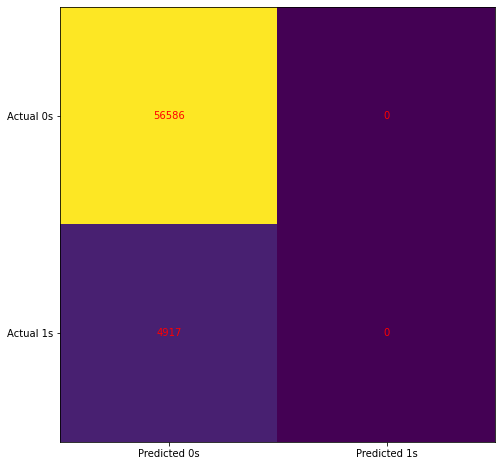

Train/Test split results:
ROC 0.6283626583932087
F1 score: 0.000000


KeyboardInterrupt: 

In [23]:
KNNScore1 = KNNModel(train_data1,test_data1)
KNNScore2 = KNNModel(train_data2,test_data2)

## 6. Decision Tree <a class="anchor" id="sixth-bullet"></a>

In [24]:
from sklearn.tree import DecisionTreeClassifier
def DTModel(train,test):
    
    
    clf = DecisionTreeClassifier()
    
     # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
    clf.fit(X = train, y = labels)
    clf_pred = clf.predict_proba(test)[:, 1]
    tescik = clf.predict(test)
    f1 = f1_score(test_labels, tescik)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, clf_pred))
    f1 = f1_score(test_labels, tescik)
    print('F1 score: %f' % f1)
    return roc_auc_score(test_labels, clf_pred),clf_pred

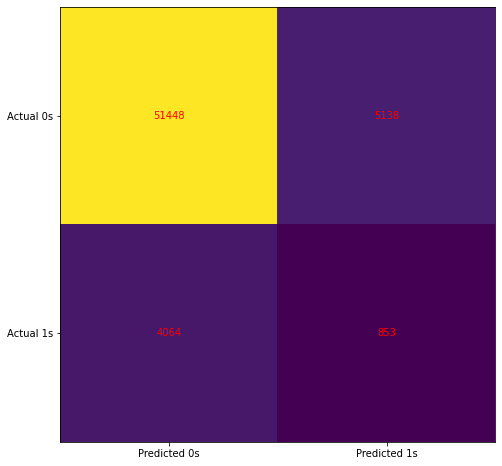

Train/Test split results:
ROC 0.5413399597996447
F1 score: 0.156399


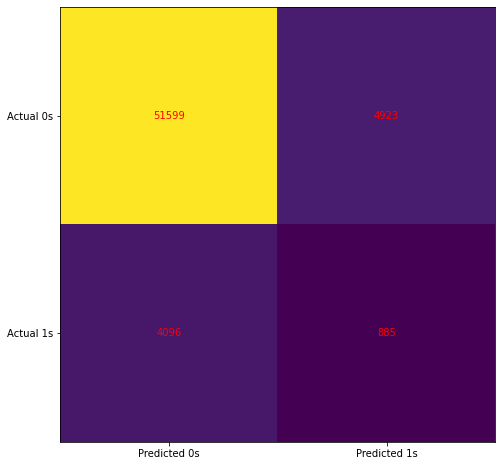

Train/Test split results:
ROC 0.5452881684273777
F1 score: 0.164056


In [26]:
DTScore1 = DTModel(train_data1,test_data1)
DTScore2 = DTModel(train_data2,test_data2)

## 7. Stacking <a class="anchor" id="seventh-bullet"></a>

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
import re
def fun2(train, test):
    # define dataset
  
    # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
    train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X = train
    y = labels
    # define the base models
    level0 = list()  
    level0.append(('dt', DecisionTreeClassifier()))
    weights = {0:0.9122, 1:0.0878}
    level0.append(('lr', LogisticRegression(C = 0.0001, class_weight=weights)))
    level0.append(('sth',BalancedRandomForestClassifier()))
    # define meta learner model
   
    level1 =BalancedRandomForestClassifier()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=2)
    # fit the model on all available data
    model.fit(X, y)
    # make a prediction for one example
    model_pred = model.predict_proba(test)[:,1]
    tescik = model.predict(test)
    f1 = f1_score(test_labels, tescik)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, model_pred))
    print("F1 score ", f1)
    return roc_auc_score(test_labels, model_pred), model_pred

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


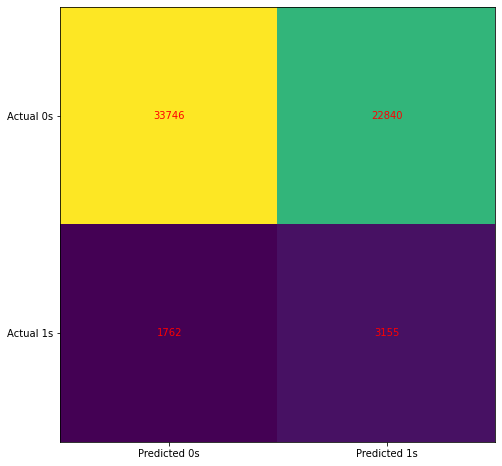

Train/Test split results:
ROC 0.6663240495940239
F1 score  0.20412784679089027


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

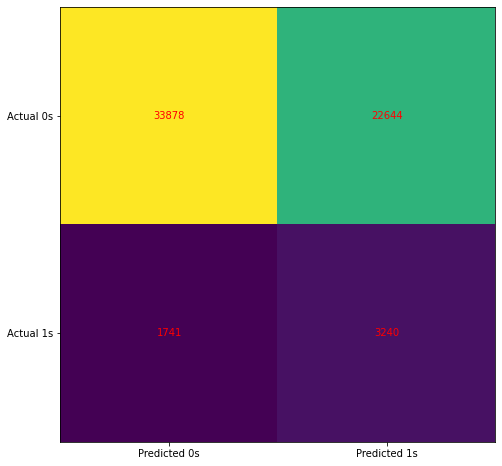

Train/Test split results:
ROC 0.6681047422546712
F1 score  0.20994654138992389


In [28]:
StackingScore1 = fun2(train_data1,test_data1)
StackingScore2 = fun2(train_data2,test_data2)

## 8. Boosting <a class="anchor" id="eigth-bullet"></a>

## 8.1 LightGBM <a class="anchor" id="nineth-bullet"></a>

In [29]:
import lightgbm as lgb
import re
from sklearn.metrics import f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

def PlainLightGBM(train,test):
    
     # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
   
    model = lgb.LGBMClassifier(class_weight ='balanced' )
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
    train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    test = test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
    n_scores = cross_val_score(model, train, labels, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
    
    model.fit(train,labels)
    model_pred =  model.predict_proba(test)[:, 1]
   
    tescik =  model.predict(test)
    f1 = f1_score(test_labels, tescik)
     
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, model_pred))
    print('F1 score: %f' % f1)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    return roc_auc_score(test_labels, model_pred), model_pred

    


Train/Test split results:
ROC 0.7492784959411157
F1 score: 0.263440


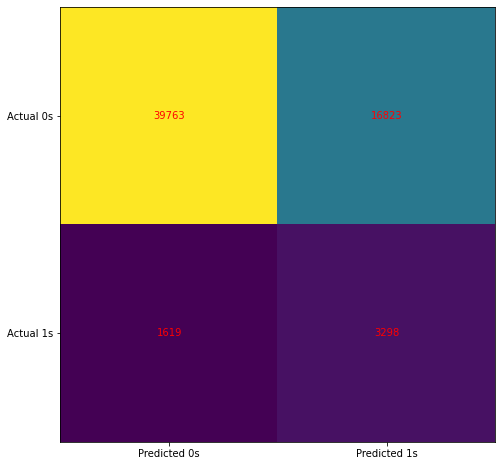

Train/Test split results:
ROC 0.7508027408010884
F1 score: 0.266053


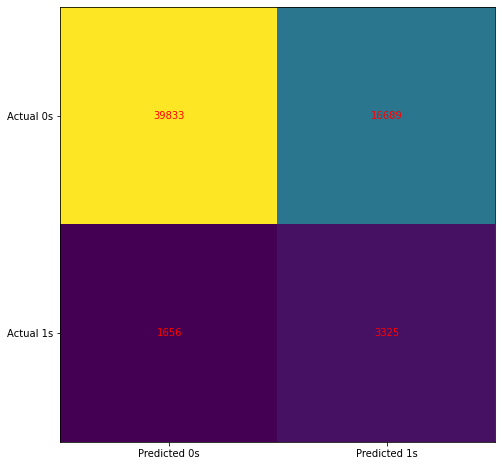

In [30]:
LGBMScore1=PlainLightGBM(train_data1,test_data1)
LGBMScore2=PlainLightGBM(train_data2,test_data2)

## 8.2 Gradient Boosting  <a class="anchor" id="tenth-bullet"></a>

In [31]:
from sklearn.neighbors import KNeighborsClassifier
# make predictions using gradient boosting for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

import re

def myBooster(train,test):
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
    train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    # define dataset
    X = train
    y = labels
    # define the model
    model = GradientBoostingClassifier()
    cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
    model.fit(X, y)
    # make a prediction for one example
    model_pred = model.predict_proba(test)[:,1]
    tescik = model.predict(test)
    f1 = f1_score(test_labels, tescik)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, model_pred))
    print('F1 score: %f' % f1)
    return roc_auc_score(test_labels, model_pred), model_pred

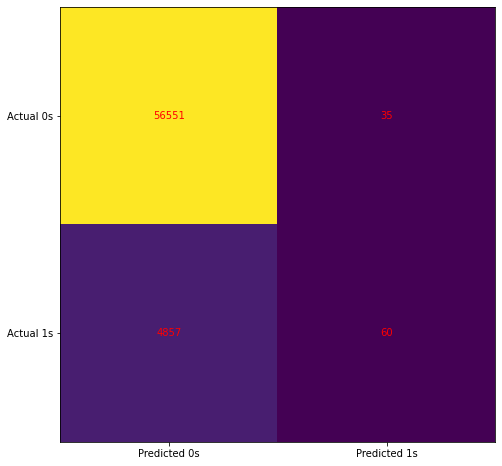

Train/Test split results:
ROC 0.747570257228894
F1 score: 0.023943


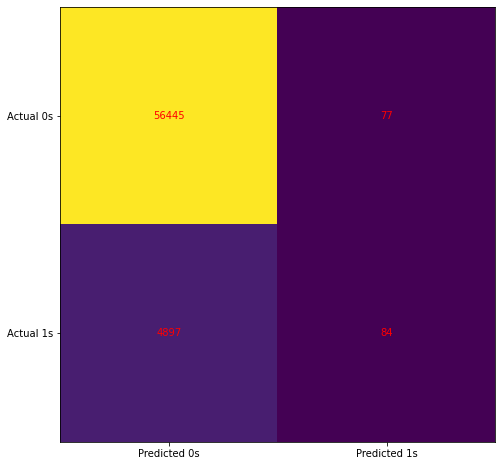

Train/Test split results:
ROC 0.747012532127232
F1 score: 0.032672


In [36]:
GBScore1=myBooster(train_data1,test_data1)
GBScore2=myBooster(train_data2,test_data2)

## 8.3 Histogram Gradient Boosting  <a class="anchor" id="11th-bullet"></a>

In [37]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

def myHistBooster(train, test):
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
    train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    # define dataset
    X = train
    y = labels
    model = HistGradientBoostingClassifier()
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
    
    model.fit(X, y)
    model_pred = model.predict_proba(test)[:,1]
    tescik = model.predict(test)
    f1 = f1_score(test_labels, tescik)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, model_pred))
    print('F1 score: %f' % f1)
    return roc_auc_score(test_labels, model_pred), model_pred
    

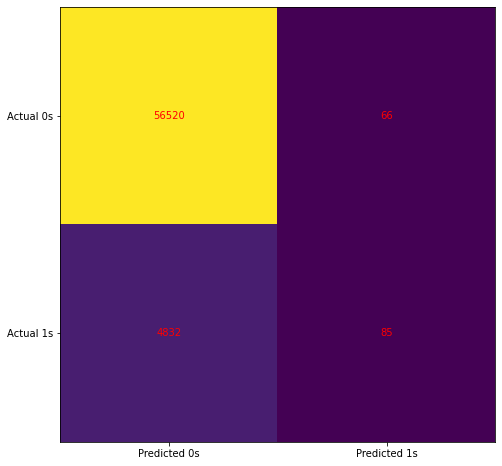

Train/Test split results:
ROC 0.7485836403759518
F1 score: 0.033544


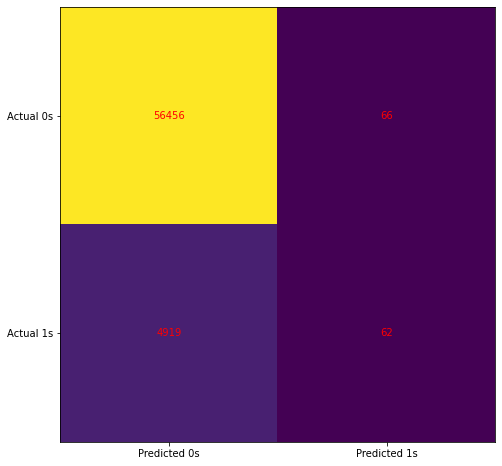

Train/Test split results:
ROC 0.7481138563262382
F1 score: 0.024271


In [38]:
HB1Score1 = myHistBooster(train_data1,test_data1)
HB1Score2 = myHistBooster(train_data2,test_data2)

In [39]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import re 
def myHistBooster2(train, test):
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
    train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    # define dataset
    X = train
    y = labels
    model = HistGradientBoostingClassifier()
    grid = dict()
    grid['learning_rate'] = [0.1]
    
    grid['max_depth'] = [7]
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # define the grid search procedure
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score='raise')
    # execute the grid search
    grid_search.fit(X, y)
    # summarize the best score and configuration
    model_pred =  grid_search.predict_proba(test)[:,1]
    tescik =  grid_search.predict(test)
    f1 = f1_score(test_labels, tescik)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, model_pred)), model_pred
    print('F1 score: %f' % f1)
    

  

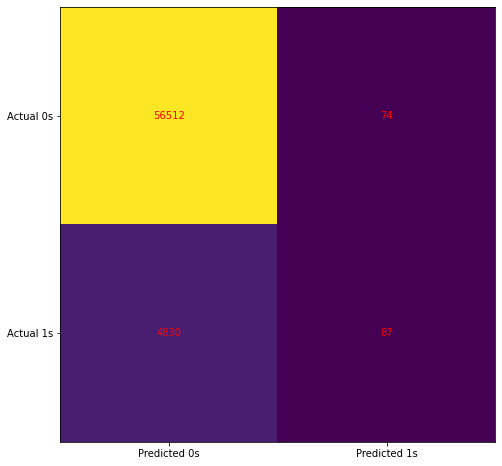

Train/Test split results:
ROC 0.7493995022782352
F1 score: 0.034265


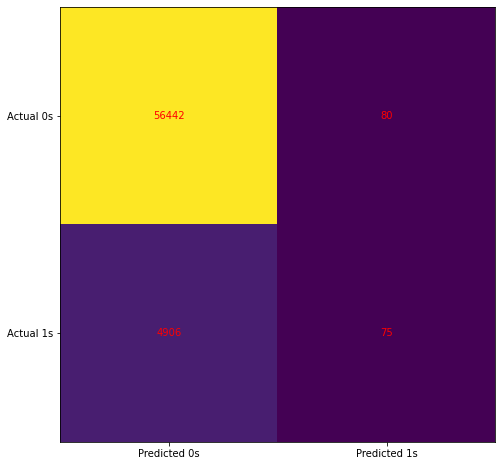

Train/Test split results:
ROC 0.7498516389099994
F1 score: 0.029206


In [40]:
HB2Score1 = myHistBooster2(train_data1,test_data1)
HB2Score2 = myHistBooster2(train_data2,test_data2)

## 9. Bagging <a class="anchor" id="12th-bullet"></a>

In [41]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 
def bagging(train, test):
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
    train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    # define dataset
    X = train
    y = labels
    seed = 1
   
    # initialize the base classifier 
    base_cls = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
    base_cls1 = BalancedRandomForestClassifier()
    weights = {0:0.9122, 1:0.0878}
    base_cls2 = LogisticRegression(C = 0.0001, class_weight=weights)
  
    # no. of base classifier 
    num_trees = 100
  
    # bagging classifier 
    model = BaggingClassifier(base_estimator = base_cls2, 
                          random_state = seed,
                             n_jobs=-1) 
    print("Fiting")
    model.fit(X,y)
    model_pred = model.predict_proba(test)[:,1]
    tescik = model.predict(test)
    f1 = f1_score(test_labels, tescik)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, model_pred)), model_pred
    print('F1 score: %f' % f1)

Fiting


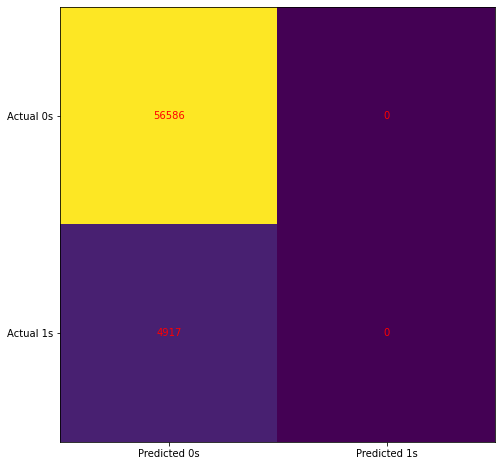

Train/Test split results:
ROC 0.6166463926781002
F1 score: 0.000000
Fiting


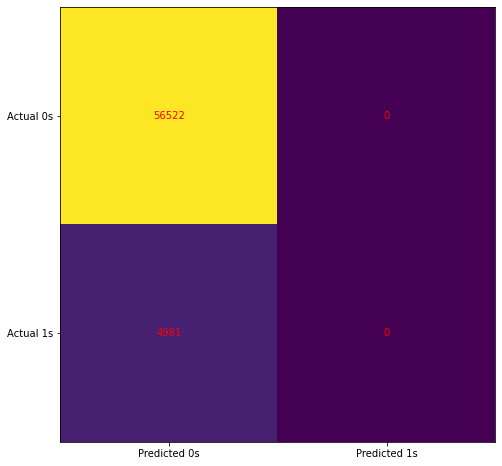

Train/Test split results:
ROC 0.6112361647485027
F1 score: 0.000000


In [42]:
BagginScore1=bagging(train_data1,test_data1)
BagginScore2=bagging(train_data2,test_data2)

In [56]:
from sklearn.metrics import roc_curve
def plotingROC(test_labels,log_reg_proba):
    fpr, tpr, thresh = roc_curve(test_labels, log_reg_proba, pos_label=1)
    random_probs = [0 for i in range(len(test_labels))]
    p_fpr, p_tpr,_  = roc_curve(test_labels, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    plt.plot(fpr, tpr, linestyle='--', color='orange', label='Logistic Regression')
    
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.show();
    

## Additional model


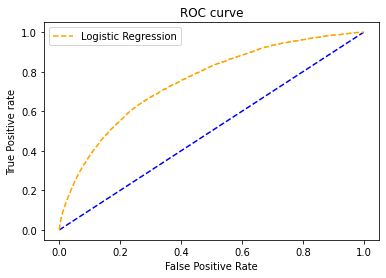

In [57]:
plotingROC(test_data2["TARGET"],LGBMScore2[1])


IndexError: invalid index to scalar variable.